In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = pd.read_excel('QVI_transaction_data.xlsx')
print(file.head(20))
file1=pd.read_csv('QVI_purchase_behaviour.csv')
print(file1.head(20))

     DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0   43390          1            1000       1         5   
1   43599          1            1307     348        66   
2   43605          1            1343     383        61   
3   43329          2            2373     974        69   
4   43330          2            2426    1038       108   
5   43604          4            4074    2982        57   
6   43601          4            4149    3333        16   
7   43601          4            4196    3539        24   
8   43332          5            5026    4525        42   
9   43330          7            7150    6900        52   
10  43602          7            7215    7176        16   
11  43332          8            8294    8221       114   
12  43603          9            9208    8634        15   
13  43329         13           13213   12447        92   
14  43600         19           19272   16686        44   
15  43604         20           20164   17136        54   
16  43330     

In [2]:
file_main=file.merge(file1,on="LYLTY_CARD_NBR",how="right")

In [3]:
print(file_main.head(20))

     DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0   43390          1            1000       1         5   
1   43359          1            1002       2        58   
2   43531          1            1003       3        52   
3   43532          1            1003       4       106   
4   43406          1            1004       5        96   
5   43462          1            1005       6        86   
6   43438          1            1007       7        49   
7   43439          1            1007       8        10   
8   43424          1            1009       9        20   
9   43352          1            1010      10        51   
10  43448          1            1010      11        59   
11  43310          1            1011      12        84   
12  43412          1            1011      13        59   
13  43435          1            1011      14        49   
14  43453          1            1011      15         1   
15  43539          1            1012      16        20   
16  43635     

In [4]:
file_main.dropna()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43359,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
2,43531,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
3,43532,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
4,43406,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...
264831,43442,88,2370701,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,YOUNG FAMILIES,Mainstream
264832,43374,88,2370751,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,YOUNG FAMILIES,Premium
264833,43397,88,2370961,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,OLDER FAMILIES,Budget
264834,43400,88,2370961,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,OLDER FAMILIES,Budget


In [5]:
file_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [6]:
file_main.duplicated().sum()

1

In [7]:
file_main=file_main.drop_duplicates()

In [8]:
file_plot=pd.DataFrame(file_main.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum","mean"]))
file_plot.sort_values(by="sum")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
NEW FAMILIES           Premium            11491.10  7.231655
                       Mainstream         17013.90  7.317806
                       Budget             21928.45  7.297321
MIDAGE SINGLES/COUPLES Budget             35514.80  7.074661
YOUNG SINGLES/COUPLES  Premium            41642.10  6.629852
MIDAGE SINGLES/COUPLES Premium            58432.65  7.112056
YOUNG SINGLES/COUPLES  Budget             61141.60  6.615624
OLDER FAMILIES         Premium            81958.40  7.322945
YOUNG FAMILIES         Premium            84025.50  7.266756
MIDAGE SINGLES/COUPLES Mainstream         90803.85  7.647284
YOUNG FAMILIES         Mainstream         92788.75  7.189025
RETIREES               Premium            97646.05  7.456174
OLDER FAMILIES         Mainstream        103445.55  7.262395
RETIREES               Budget            113147.80  7.443445
OLDER SINGLES/COUPLES  Premium           132257.15  7.449848
                       Mainstream        133393.80  7.282116
                       Budget            136769.80  7.430315
YOUNG FAMILIES         Budget            139345.85  7.287201
RETIREES               Mainstream        155677.05  7.252262
YOUNG SINGLES/COUPLES  Mainstream        157621.60  7.558339
OLDER FAMILIES         Budget            168363.25  7.269570

In [9]:
file_plot["sum"].sum()

1934408.999999976

<AxesSubplot:ylabel='LIFESTAGE,PREMIUM_CUSTOMER'>

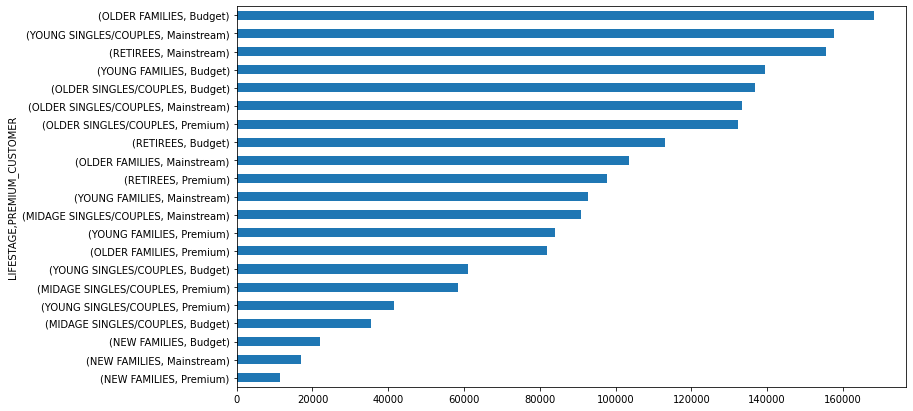

In [10]:
file_plot["sum"].sort_values().plot.barh(figsize=(12,7))

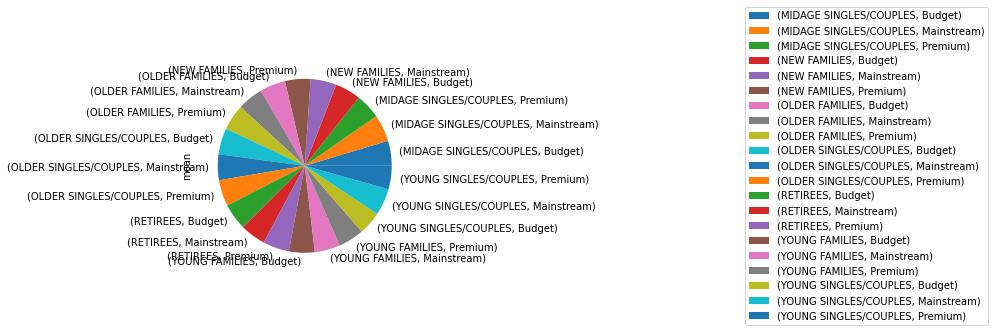

In [11]:
file_plot.plot.pie(y="mean")
plt.legend(loc="center left",bbox_to_anchor=(2.5,0.5))
plt.savefig("mean of LIFESTYLE")

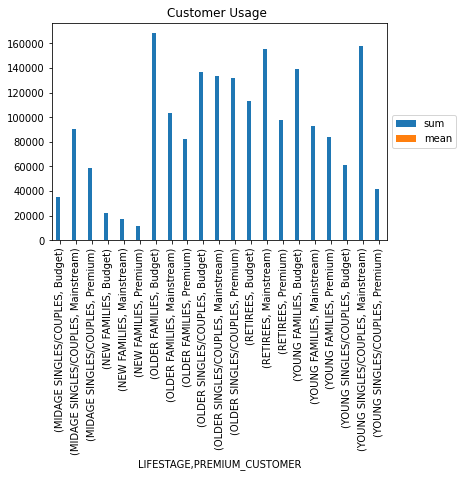

In [12]:
file_plot.plot(title="Customer Usage ",kind="bar")
plt.legend(loc='center left',bbox_to_anchor=(1.0,0.5))

In [13]:
plt.savefig('Usage of customer.png')

<Figure size 432x288 with 0 Axes>

In [14]:
from datetime import date, timedelta
start = date(1899,12,30)

new_date_format = []

for date in file_main["DATE"]:
    delta = timedelta(date)
    new_date_format.append(start + delta)

In [15]:
file_main["DATE"]=pd.to_datetime(pd.Series(new_date_format))
print(file_main["DATE"])

0        2018-10-17
1        2018-09-16
2        2019-03-07
3        2019-03-08
4        2018-11-02
            ...    
264831   2018-10-01
264832   2018-10-24
264833   2018-10-27
264834   2018-12-14
264835          NaT
Name: DATE, Length: 264835, dtype: datetime64[ns]


In [16]:
file_main["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'Red Rock Deli Chikn&Garlic Aioli 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Natural ChipCo      Hony Soy Chckn175g',
       'WW Original Stacked Chips 160g', 'Cheetos Puffs 165g',
       'Infuzions SourCream&Herbs Veg Strws 110g',
       'RRD SR Slow Rst     Pork Belly 150g',
       'Doritos Cheese      Supreme 330g', 'Doritos Mexicana    170g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Smiths Crinkle Cut  Chips Barbecue 170g',
       'Kettle Sensations   Camembert & Fig 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'CCs Tasty Cheese    175g', 'Tostitos Splash Of  Lime 175g',
       'Kettle 135g Swt Pot Sea Salt', 'RRD Salt & Vinegar  165g',
       'Infuzions Mango     Chutny Papadums 70g',
       'Smiths Crinkle Cut  Snag&Sauce 150g',
       'Smiths Crinkle      Original 330g',
       'RRD Sweet Chilli &  Sour Cream 165g',
     

In [17]:
splitting=file_main["PROD_NAME"].str.replace(r'([0-9]+[gG])',' ').str.replace(r'[^\w]',' ').str.split()

In [18]:
count_word={}
def count_words(line):
    for word in line:
        if word not in count_word:
            count_word[word]=1
        else:
            count_word[word]+=1
splitting.apply(lambda line: count_words(line))
print(pd.Series(count_word).sort_values(ascending=False))


Chips     49770
Kettle    41288
Smiths    28859
Salt      27976
Cheese    27890
          ...  
Onin       1432
Pc         1431
Garden     1419
NCC        1419
Fries      1418
Length: 198, dtype: int64


In [19]:
file_main.sort_values(by="PROD_QTY",ascending=False).head().tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
221626,2018-10-14,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
221625,2019-05-20,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
123320,2018-10-14,122,122207,125864,5,Natural Chip Compny SeaSalt175g,5,15.0,OLDER FAMILIES,Premium
89729,2018-08-16,93,93152,91631,46,Kettle Original 175g,5,27.0,RETIREES,Premium
76734,2018-08-15,80,80018,78356,26,Pringles Sweet&Spcy BBQ 134g,5,18.5,MIDAGE SINGLES/COUPLES,Mainstream


In [20]:
file_main=file_main[file_main["PROD_QTY"]<6]

In [21]:
file_main["DATE"].describe(datetime_is_numeric=True)

count                           264832
mean     2018-12-30 00:52:41.636056064
min                2018-07-01 00:00:00
25%                2018-09-30 00:00:00
50%                2018-12-30 00:00:00
75%                2019-03-31 00:00:00
max                2019-06-30 00:00:00
Name: DATE, dtype: object

In [22]:
splitting.head(10)

0             [Natural, Chip, Compny, SeaSalt]
1      [Red, Rock, Deli, Chikn, Garlic, Aioli]
2          [Grain, Waves, Sour, Cream, Chives]
3          [Natural, ChipCo, Hony, Soy, Chckn]
4               [WW, Original, Stacked, Chips]
5                             [Cheetos, Puffs]
6    [Infuzions, SourCream, Herbs, Veg, Strws]
7            [RRD, SR, Slow, Rst, Pork, Belly]
8                   [Doritos, Cheese, Supreme]
9                          [Doritos, Mexicana]
Name: PROD_NAME, dtype: object

In [23]:
pd.date_range(start=file_main["DATE"].min(),end=file_main["DATE"].max()).difference(file_main["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [24]:
null_date=pd.merge(pd.Series(pd.date_range(start=file_main["DATE"].min(),end=file_main["DATE"].max()),name="DATE"),file_main,on="DATE",how="left")

<ipython-input-25-af1859baba40>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  decem=trans_date[(trans_date.index>=pd.datetime(2018,12,1))&(trans_date.index<pd.datetime(2019,1,1))].sort_index()
c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


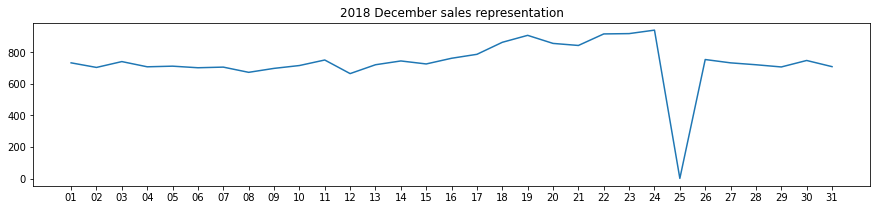

In [25]:
trans_date=null_date["DATE"].value_counts()
decem=trans_date[(trans_date.index>=pd.datetime(2018,12,1))&(trans_date.index<pd.datetime(2019,1,1))].sort_index()
decem.index=decem.index.strftime('%d')
ax=decem.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(decem)))
ax.set_xticklabels(decem.index)
plt.title("2018 December sales representation")
plt.savefig("2018 december sales representation")
plt.show()

count    258769.000000
mean        182.324305
std          64.955159
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64


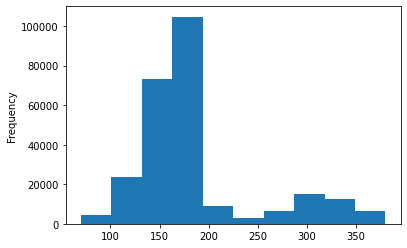

In [35]:
file_main["PROD_NAME"]=file_main["PROD_NAME"].str.replace(r'[0-9]+(G)','g')
package_size=file_main["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").astype("float")
print(package_size.describe().dropna())
package_size.plot.hist()
plt.savefig("Package items")


In [29]:
file_main["PROD_NAME"].str.split().str[0].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       24962
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Old            9324
Pringles      25102
RRD           11894
Red            5885
Smith          2963
Smiths        28859
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     4437
Name: PROD_NAME, dtype: int64

In [32]:
file_main["Brand_Names"]=file_main["PROD_NAME"].str.split().str[0]
def Brand_Names(line):
    brand = line["Brand_Names"]
    if brand == "Dorito":
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand
file_main["Brand_Names"]=file_main.apply(lambda line: Brand_Names(line),axis=1)

c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


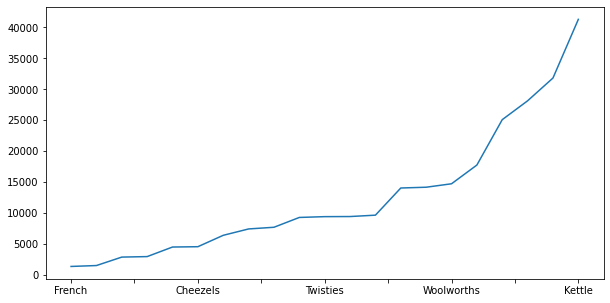

In [36]:
file_main["Brand_Names"].value_counts(ascending=True).plot.line(figsize=(10,5))
plt.savefig("Brand graph ")


.......... YOUNG SINGLES/COUPLES - Premium ...........
Kettle     838
Smiths     826
Doritos    570
Name: Brand_Names, dtype: int64


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


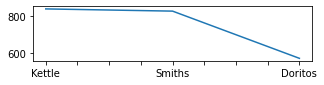

.......... YOUNG SINGLES/COUPLES - Mainstream ...........
Kettle      3844
Doritos     2541
Pringles    2315
Name: Brand_Names, dtype: int64


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


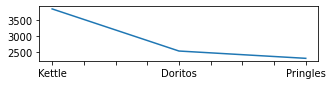

.......... YOUNG SINGLES/COUPLES - Budget ...........
Smiths     1245
Kettle     1211
Doritos     899
Name: Brand_Names, dtype: int64


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


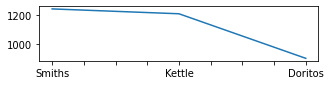

.......... YOUNG FAMILIES - Premium ...........
Kettle     1745
Smiths     1442
Doritos    1129
Name: Brand_Names, dtype: int64


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


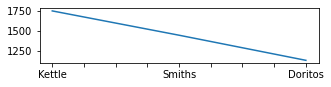

.......... YOUNG FAMILIES - Mainstream ...........
Kettle     1789
Smiths     1772
Doritos    1309
Name: Brand_Names, dtype: int64


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


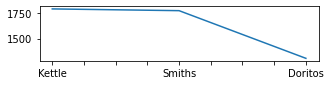

.......... YOUNG FAMILIES - Budget ...........
Kettle     2743
Smiths     2459
Doritos    1996
Name: Brand_Names, dtype: int64


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


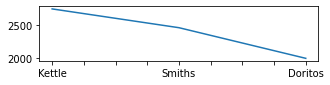

.......... OLDER SINGLES/COUPLES - Premium ...........


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Kettle     2947
Smiths     2041
Doritos    1958
Name: Brand_Names, dtype: int64


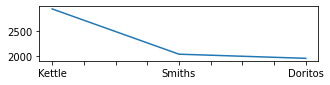

.......... OLDER SINGLES/COUPLES - Mainstream ...........
Kettle     2835
Smiths     2180
Doritos    2008
Name: Brand_Names, dtype: int64


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


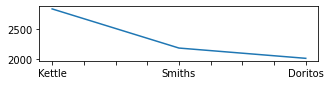

.......... OLDER SINGLES/COUPLES - Budget ...........
Kettle     3065
Smiths     2098
Doritos    1954
Name: Brand_Names, dtype: int64


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


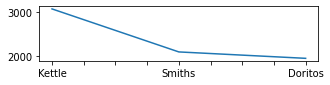

.......... MIDAGE SINGLES/COUPLES - Premium ...........
Kettle     1206
Smiths      986
Doritos     837
Name: Brand_Names, dtype: int64


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


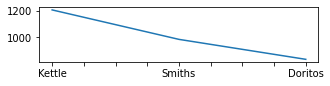

.......... MIDAGE SINGLES/COUPLES - Mainstream ...........


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Kettle     2136
Smiths     1337
Doritos    1291
Name: Brand_Names, dtype: int64


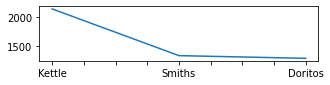

.......... MIDAGE SINGLES/COUPLES - Budget ...........
Kettle     713
Smiths     633
Doritos    533
Name: Brand_Names, dtype: int64


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


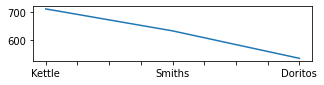

.......... NEW FAMILIES - Premium ...........
Kettle      247
Doritos     167
Pringles    165
Name: Brand_Names, dtype: int64

c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


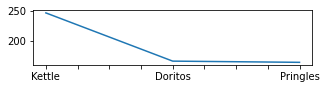

.......... NEW FAMILIES - Mainstream ...........
Kettle     414
Doritos    274
Smiths     254
Name: Brand_Names, dtype: int64


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


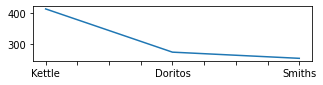

.......... NEW FAMILIES - Budget ...........
Kettle     510
Doritos    343
Smiths     341
Name: Brand_Names, dtype: int64


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


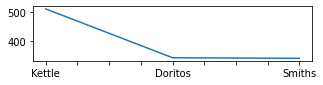

.......... OLDER FAMILIES - Premium ...........


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Smiths     1515
Kettle     1512
Doritos    1065
Name: Brand_Names, dtype: int64


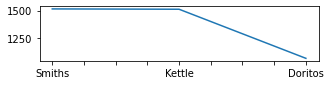

.......... OLDER FAMILIES - Mainstream ...........
Kettle     2019
Smiths     1835
Doritos    1449
Name: Brand_Names, dtype: int64


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


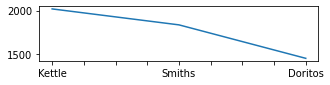

.......... OLDER FAMILIES - Budget ...........
Kettle     3320
Smiths     3093
Doritos    2351
Name: Brand_Names, dtype: int64


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


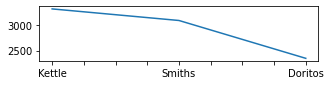

.......... RETIREES - Premium ...........


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Kettle     2216
Smiths     1458
Doritos    1409
Name: Brand_Names, dtype: int64


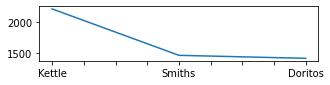

.......... RETIREES - Mainstream ...........
Kettle     3386
Smiths     2476
Doritos    2320
Name: Brand_Names, dtype: int64


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


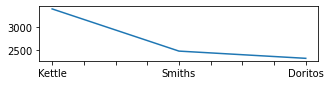

.......... RETIREES - Budget ...........
Kettle     2592
Doritos    1742
Smiths     1679
Name: Brand_Names, dtype: int64


c:\Users\jayan\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


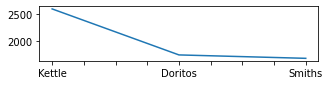

<Figure size 432x288 with 0 Axes>

In [42]:
for stage in file_main["LIFESTAGE"].unique():
    for prem in file_main["PREMIUM_CUSTOMER"].unique():
        print('..........',stage, '-', prem,'...........')
        summary = file_main[(file_main["LIFESTAGE"] == stage) & (file_main["PREMIUM_CUSTOMER"] == prem)]["Brand_Names"].value_counts().head(3)
        print(summary)
        plt.figure()
        summary.plot.line(figsize=(5,1))
        plt.show()
plt.savefig("Unique purchase")